

# Project: Investigate a Dataset - [TMDb]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information for more than 1,000 movies collected from TMDb including Cast's,Director's,Runtime,Genres and User's Reviews. In general it's useful for watchers, production companies and other film industry professionals. 


### Question(s) for Analysis
>Which genres are most popular from year to year?




>What is the average time for a movie?



In [1]:
# First set up import statements the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install pandas==0.24.2

    100% |████████████████████████████████| 10.1MB 3.2MB/s eta 0:00:01   47% |███████████████▍                | 4.9MB 23.7MB/s eta 0:00:01    59% |███████████████████             | 6.0MB 25.4MB/s eta 0:00:01
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you 


In [3]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv',encoding='utf-8')
df.info()
print(df.isnull().sum())
#print(df.isna().sum())
print(df.duplicated().sum())
# After checking the data given and inspecting it.
# It consists of 10866 columns 21 rows and there are 1 duplicated data and alot of NaN values.
# After considering options to deal with NaN values we could fill them with 0 or drop them.
# Therefore, I choose to drop them as it illogical to calculate with 0 values and remove duplicated values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
>Reference: 
https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe
.
 

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.duplicated().sum())
print(df.isna().sum())
# in order to answer to our question we have to do statistical analysis on the data
print(df.revenue.describe())
# seems like we still need to more cleaning operations on the data as min and 25% seems to have 0 as value
print(df.describe())
# after more investigating done it's seem like revenue,budget,budget,budget_adj and revenue_adj have the same issues
to_be_handel = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[to_be_handel] = df[to_be_handel].replace(0, np.NAN)
df.dropna(subset=to_be_handel, inplace=True)
print(df.budget.describe())
# now dataset is completely cleaned

0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64
count    1.992000e+03
mean     1.152153e+08
std      2.202887e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.578782e+07
75%      1.278787e+08
max      2.781506e+09
Name: revenue, dtype: float64
                  id   popularity        budget       revenue      runtime  \
count    1992.000000  1992.000000  1.992000e+03  1.992000e+03  1992.000000   
mean    71652.152108     1.316763  3.454924e+07  1.152153e+08   106.040161   

<a id='eda'></a>
## Exploratory Data Analysis
>References:

https://stackoverflow.com/questions/53860398/pandas-dataframe-how-do-i-split-one-row-into-multiple-rows-by-multi-value-colum



https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas



https://docs.python.org/3/tutorial/datastructures.html


https://stackoverflow.com/questions/30942755/plotting-multiple-time-series-after-a-groupby-in-pandas/52526454#52526454



https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot


https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group


### Research Question 1 (Which genres are most popular from year to year?)

Text(0,0.5,'Genre')

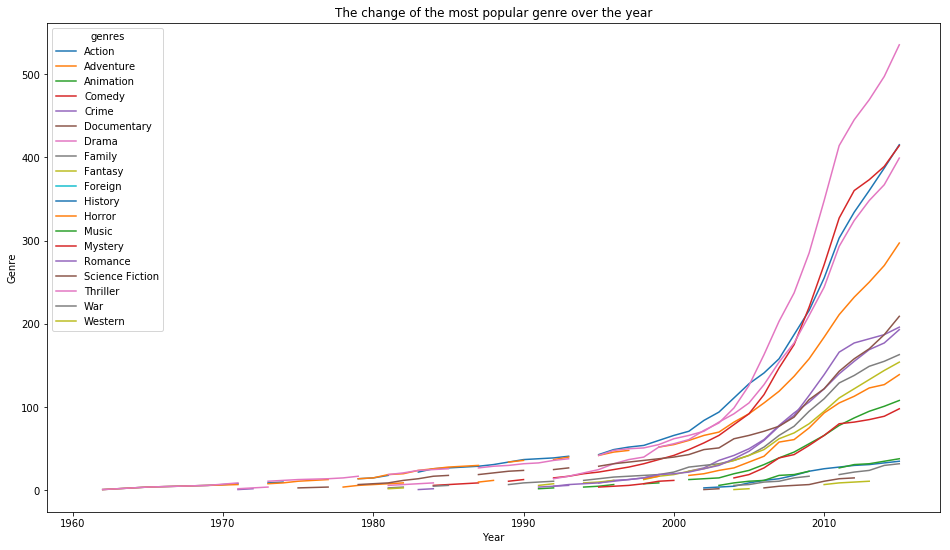

In [12]:
# in order to answer we need to set popular criteria from the database
# which is popular,genres and release_year
df_q1 = df[['release_year', 'genres', 'popularity']]
df_q1.head()
# genres aren't formated well and seperated by |
def getting_max(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

df_q1['genres'] = df_q1['genres'].str.split('|')
df_q1 = (df_q1
 .set_index(['release_year','popularity'])['genres']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .rename(columns={0:'genres'}))
df_q1.head()
del df_q1['level_2']
df_q1.head()
#df_q1.loc[df['popularity'].idxmax()]
getting_max(df_q1)
graph = df_q1.groupby(['release_year', 'genres']).count()['popularity'].unstack().cumsum()
graph.plot(figsize=(16,9))
plt.title('The change of the most popular genre over the year')
plt.xlabel('Year')
plt.ylabel('Genre')

This graph show us clearly the growth of different Genre (Y-axis) from 60's to 2010's (X-axis)
and as we can see Comdey,Drama,Thriller,Adventure and Action curves are the highest in the graph. For more detail a map key is provided in the graph

### Research Question 2  (What is the average time for a movie?)

Text(0,0.5,'Total Count of Movies')

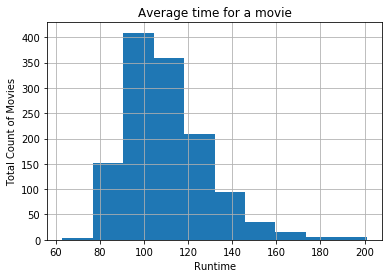

In [10]:
df["runtime"].describe()
#Therefore average time is 110.27 minute
graph = df["runtime"].hist()
graph.plot(figsize=(16,9))
plt.title('Average time for a movie')
plt.xlabel('Runtime')
plt.ylabel('Total Count of Movies')

The previous graph represent time for the whole dataset as we can see for most of movies start to end between 70 and 80 minutes as the graph rise then end till nearly 111 minute as the graph start to decline .


<a id='conclusions'></a>
## Conclusions

> ***In general after data analysis we have conclude the following:***

Most popular genre of the movie have been on changing over the years,Comdey,Drama,Thriller,Adventure and Action hold the biggest share in the genres.


Average duration of the movie is 111 minutes.

> ***Limitions:***

Data need to well handle as there are many missing values mentioned and handled but it must affect the results of the following analysis also there are missing information in the data like currency unit causing it difficult to analyse the cost and the profit precisely and during analysis i noticed that release_date is provided as string not as int or float to handle as numbers as should be to gain further analysis.All in all provided file should be more accurate and well handled 



In [11]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0